In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

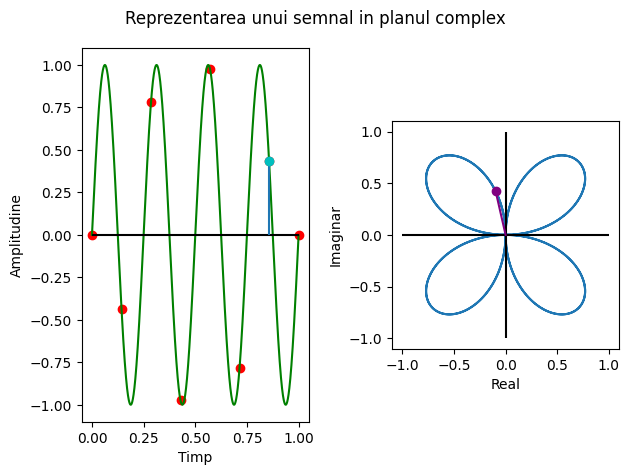

In [95]:
# Exercitiul 1

f0 = 4
fs = 7
t = 1

# axa de numere
axa = np.arange(0, t, 0.0001)
axa2 = np.linspace(0, t, (fs + 1) * t)

# semnal de tip sinus
def sin (t, f):
    return np.sin(2 * np.pi * f0 * t)

def y (t, f):
    return math.e ** (-2 * np.pi * 1j * t * 2) * sin(t, f)

# aplicam functiile la fiecare moment de timp pentru a vedea valoarea semnalului
val = sin(axa, f0)
val_y = y(axa, f0)


# construim graficele
fig, axs = plt.subplots(1, 2)
fig.suptitle("Reprezentarea unui semnal in planul complex")

# subploturile
axs[0].plot(axa, val, color='g')
axs[0].scatter(axa2, sin(axa2, f0), color = 'r')
axs[0].set(xlabel='Timp', ylabel='Amplitudine')
axs[0].hlines(y=0, xmin=0, xmax=1, color='black')

markerline, _, _ = axs[0].stem(axa2[6], sin(axa2[6], f0))
markerline.set_markerfacecolor('c')
markerline.set_markeredgecolor('c')


axs[1].plot(val_y.real, val_y.imag)
axs[1].set(xlabel='Real', ylabel='Imaginar')
axs[1].hlines(y=0, xmin=-1, xmax=1, color='black')
axs[1].vlines(x=0, ymin=-1, ymax=1, color='black')
axs[1].set_box_aspect(1)

val6 = y(axa2[6], f0)
# axs[1].plot(0, 0, marker='o', color='purple')
axs[1].plot(val6.real, val6.imag, marker='o', color='purple')
axs[1].plot([0, val6.real], [0, val6.imag], color='purple')

# axs[1].grid

fig.tight_layout()

plt.show()


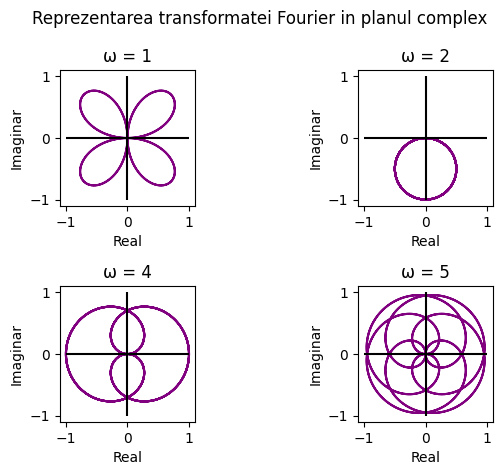

In [106]:
# Exercitiul 1

f0 = 4
fs = 7
t = 1

# axa de numere
axa = np.arange(0, t, 0.0001)
axa2 = np.linspace(0, t, (fs + 1) * t)
# t = np.arange(0, 1, 0.00001)

# semnal de tip sinus
def sin (t, f):
    return np.sin(2 * np.pi * f0 * t)

def z (t, f, w):
    return math.e ** (-2 * np.pi * 1j * t * 2 * w) * sin(t, f)

ws = [1, 2, 4, 5]

# aplicam functiile la fiecare moment de timp pentru a vedea valoarea semnalului
val = sin(axa, f0)

val_z0 = z(axa, f0, ws[0])
val_z1 = z(axa, f0, ws[1])
val_z2 = z(axa, f0, ws[2])
val_z3 = z(axa, f0, ws[3])


# construim graficele
fig, axs = plt.subplots(2, 2)
fig.suptitle("Reprezentarea transformatei Fourier in planul complex")

# subploturile
axs[0, 0].plot(val_z0.real, val_z0.imag, color='purple')
axs[0, 0].set(xlabel='Real', ylabel='Imaginar')
axs[0, 0].hlines(y=0, xmin=-1, xmax=1, color='black')
axs[0, 0].vlines(x=0, ymin=-1, ymax=1, color='black')
axs[0, 0].set_box_aspect(1)
axs[0, 0].set_title("ω = 1")

axs[0 ,1].plot(val_z1.real, val_z1.imag, color='purple')
axs[0, 1].set(xlabel='Real', ylabel='Imaginar')
axs[0, 1].hlines(y=0, xmin=-1, xmax=1, color='black')
axs[0, 1].vlines(x=0, ymin=-1, ymax=1, color='black')
axs[0, 1].set_box_aspect(1)
axs[0, 1].set_title("ω = 2")

axs[1, 0].plot(val_z2.real, val_z2.imag, color='purple')
axs[1, 0].set(xlabel='Real', ylabel='Imaginar')
axs[1, 0].hlines(y=0, xmin=-1, xmax=1, color='black')
axs[1, 0].vlines(x=0, ymin=-1, ymax=1, color='black')
axs[1, 0].set_box_aspect(1)
axs[1, 0].set_title("ω = 4")

axs[1, 1].plot(val_z3.real, val_z3.imag, color='purple')
axs[1, 1].set(xlabel='Real', ylabel='Imaginar')
axs[1, 1].hlines(y=0, xmin=-1, xmax=1, color='black')
axs[1, 1].vlines(x=0, ymin=-1, ymax=1, color='black')
axs[1, 1].set_box_aspect(1)
axs[1, 1].set_title("ω = 5")

fig.tight_layout()

plt.show()



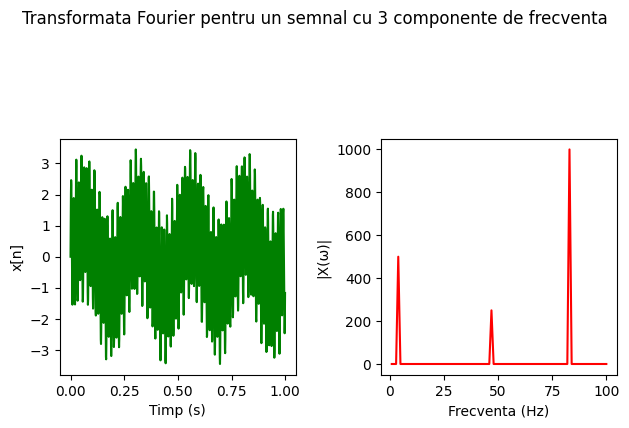

In [174]:
# Exercitiul 2

f1 = 4
f2 = 47
f3 = 83

fs = 4

# axa de numere
axa = np.arange(0, 1, 0.001)

# t = np.arange(0, 1, 0.00001)

ws = np.arange(1, 101, 1)

# semnal compus
def signal(t):
    return np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 2 * np.sin(2 * np.pi * f3 * t)

def tF (N):
    sol = []
    for w in ws:
        ans = 0
        for te in axa:
            x = signal(te) * (math.e ** (-2 * np.pi * 1j * w * te / N))
            ans += x
        sol.append(abs(ans))
    return sol

N = 1
semnal = signal(axa)
tfs = tF(N)


# construim graficele
fig, axs = plt.subplots(1, 2)
fig.suptitle("Transformata Fourier pentru un semnal cu 3 componente de frecventa")

# subploturile
axs[0].plot(axa, semnal, color='g')
axs[0].set(xlabel='Timp (s)', ylabel='x[n]')
axs[0].set_box_aspect(1)

axs[1].plot(ws, tfs, color='r')
axs[1].set(xlabel='Frecventa (Hz)', ylabel='|X(ω)|')
axs[1].set_box_aspect(1)

fig.tight_layout()

# Observam ca modulul transformtei Fourier este diferit de doar pentru ω = f1, ω = f2, ω = f3.